In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from yellowbrick.regressor import PredictionError, ResidualsPlot

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data preprocessing

In [3]:
# check data
print(df.shape)
print(df.isnull().sum())

(200, 4)
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
# Correlation matrix
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


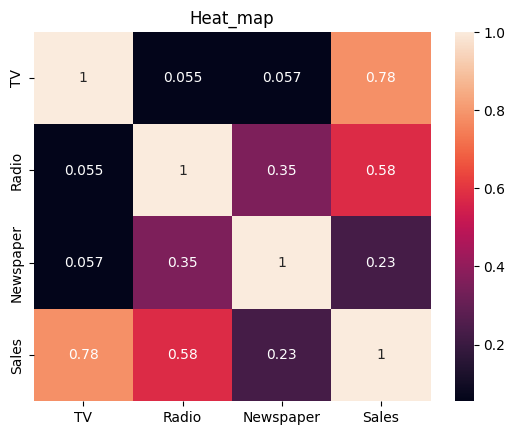

In [6]:
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.title("Heat_map")
plt.show()

In [7]:
# splitting data in training and testing set
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)

In [8]:

print(x_train)

        TV  Radio  Newspaper
71   109.8   14.3       31.7
90   134.3    4.9        9.3
100  222.4    4.3       49.8
44    25.1   25.7       43.3
94   107.4   14.0       10.9
..     ...    ...        ...
58   210.8   49.6       37.7
21   237.4    5.1       23.5
49    66.9   11.7       36.8
64   131.1   42.8       28.9
68   237.4   27.5       11.0

[140 rows x 3 columns]


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [11]:
print(x_train_scaler)

[[0.36895502 0.28830645 0.27616535]
 [0.45180927 0.09879032 0.07915567]
 [0.74974636 0.08669355 0.4353562 ]
 [0.08251606 0.51814516 0.37818821]
 [0.36083869 0.28225806 0.09322779]
 [0.83767332 0.60887097 0.1759015 ]
 [0.74332093 0.66935484 0.33069481]
 [0.70645925 0.41532258 0.09146878]
 [0.61515049 0.93145161 0.51363237]
 [0.73621914 0.55846774 0.46701847]
 [0.98816368 0.57056452 0.37730871]
 [0.26208996 0.94354839 0.30079156]
 [0.06391613 0.40524194 0.14687775]
 [0.4808928  0.59072581 0.10817942]
 [0.67331755 0.0625     0.30167106]
 [0.0557998  0.08266129 0.27528584]
 [0.55765979 0.2016129  0.15215479]
 [0.85593507 0.42943548 0.26121372]
 [0.78254988 0.1733871  0.07387863]
 [0.86134596 0.54233871 0.04573439]
 [0.25160636 0.70564516 0.46086192]
 [0.9773419  0.85282258 0.44766931]
 [0.62292864 0.4233871  0.19085312]
 [0.73080825 0.88508065 0.23658751]
 [0.2874535  0.72177419 0.43095866]
 [0.74974636 0.06854839 0.11257696]
 [0.30334799 0.00604839 0.20140721]
 [0.08826513 0.66532258 0.16

In [12]:
print(x_test_scaler)

[[0.02231992 0.56653226 0.36147757]
 [0.25025364 0.99596774 0.39929639]
 [0.4687183  0.29233871 0.08707124]
 [0.38992222 0.15524194 0.2005277 ]
 [0.25600271 0.53830645 0.19349164]
 [0.96482922 0.28024194 0.02990325]
 [0.97024011 0.86693548 0.62884785]
 [0.2211701  0.11693548 0.21020229]
 [0.74264457 0.98790323 0.02550572]
 [0.80689888 0.3125     0.23746702]
 [0.23097734 0.1875     0.00527704]
 [0.94927291 0.7983871  0.48812665]
 [0.74095367 0.67540323 0.39401935]
 [0.12681772 0.07459677 0.11873351]
 [0.80960433 0.14717742 0.07387863]
 [0.14338857 0.53830645 0.3060686 ]
 [0.56712885 0.14314516 0.10993843]
 [0.14879946 0.52016129 0.17854002]
 [0.84612783 0.7358871  0.63324538]
 [0.23638823 0.32258065 0.35620053]
 [0.77578627 0.76209677 0.60598065]
 [0.0557998  0.92540323 0.60686016]
 [0.75515725 0.0483871  0.13456464]
 [0.52722354 0.05241935 0.0703606 ]
 [0.54988164 0.63709677 0.46262093]
 [0.06121069 0.4375     0.44063325]
 [0.69090294 0.90927419 0.16974494]
 [0.76868448 0.76008065 0.27

# Model Building

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import SGD

In [14]:
model_ann = Sequential()
model_ann.add(Dense(4,input_dim=3,activation='relu'))
model_ann.add(Dense(4,activation='relu'))
model_ann.add(Dense(1,activation='linear'))

In [15]:
model_ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_ann.compile(loss='mse',optimizer='Adam')

In [17]:
model_ann.fit(x_train_scaler,y_train,epochs=1000,validation_split=0.2)

Epoch 1/1000
4/4 [==============================] - 1s 48ms/step - loss: 228.6679 - val_loss: 210.9454
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 228.3662 - val_loss: 210.6734
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 228.0510 - val_loss: 210.4042
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 227.7454 - val_loss: 210.1299
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 227.4371 - val_loss: 209.8490
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 227.1154 - val_loss: 209.5531
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 226.7975 - val_loss: 209.2482
Epoch 8/1000
4/4 [==============================] - 0s 11ms/step - loss: 226.4711 - val_loss: 208.9394
Epoch 9/1000
4/4 [==============================] - 0s 13ms/step - loss: 226.1360 - val_loss: 208.6226
Epoch 10/1000
4/4 [==============================] - 0s 14ms/step - loss:

Epoch 80/1000
4/4 [==============================] - 0s 16ms/step - loss: 152.3660 - val_loss: 138.9508
Epoch 81/1000
4/4 [==============================] - 0s 20ms/step - loss: 150.2688 - val_loss: 137.0088
Epoch 82/1000
4/4 [==============================] - 0s 19ms/step - loss: 148.1451 - val_loss: 135.0514
Epoch 83/1000
4/4 [==============================] - 0s 17ms/step - loss: 146.0477 - val_loss: 133.0672
Epoch 84/1000
4/4 [==============================] - 0s 19ms/step - loss: 143.9436 - val_loss: 131.0603
Epoch 85/1000
4/4 [==============================] - 0s 17ms/step - loss: 141.7356 - val_loss: 129.0651
Epoch 86/1000
4/4 [==============================] - 0s 14ms/step - loss: 139.5192 - val_loss: 127.0598
Epoch 87/1000
4/4 [==============================] - 0s 18ms/step - loss: 137.3630 - val_loss: 125.0044
Epoch 88/1000
4/4 [==============================] - 0s 12ms/step - loss: 135.1684 - val_loss: 122.9216
Epoch 89/1000
4/4 [==============================] - 0s 18ms/ste

4/4 [==============================] - 0s 17ms/step - loss: 8.4469 - val_loss: 12.3542
Epoch 240/1000
4/4 [==============================] - 0s 16ms/step - loss: 8.4326 - val_loss: 12.3342
Epoch 241/1000
4/4 [==============================] - 0s 16ms/step - loss: 8.4185 - val_loss: 12.3105
Epoch 242/1000
4/4 [==============================] - 0s 16ms/step - loss: 8.4028 - val_loss: 12.2902
Epoch 243/1000
4/4 [==============================] - 0s 16ms/step - loss: 8.3891 - val_loss: 12.2706
Epoch 244/1000
4/4 [==============================] - 0s 16ms/step - loss: 8.3762 - val_loss: 12.2562
Epoch 245/1000
4/4 [==============================] - 0s 10ms/step - loss: 8.3621 - val_loss: 12.2373
Epoch 246/1000
4/4 [==============================] - 0s 10ms/step - loss: 8.3462 - val_loss: 12.2139
Epoch 247/1000
4/4 [==============================] - 0s 10ms/step - loss: 8.3316 - val_loss: 12.1926
Epoch 248/1000
4/4 [==============================] - 0s 11ms/step - loss: 8.3179 - val_loss: 12.

4/4 [==============================] - 0s 11ms/step - loss: 6.2133 - val_loss: 9.0043
Epoch 401/1000
4/4 [==============================] - 0s 11ms/step - loss: 6.1989 - val_loss: 8.9856
Epoch 402/1000
4/4 [==============================] - 0s 11ms/step - loss: 6.1837 - val_loss: 8.9678
Epoch 403/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.1715 - val_loss: 8.9491
Epoch 404/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.1577 - val_loss: 8.9288
Epoch 405/1000
4/4 [==============================] - 0s 10ms/step - loss: 6.1437 - val_loss: 8.9066
Epoch 406/1000
4/4 [==============================] - 0s 11ms/step - loss: 6.1321 - val_loss: 8.8863
Epoch 407/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.1174 - val_loss: 8.8705
Epoch 408/1000
4/4 [==============================] - 0s 10ms/step - loss: 6.1043 - val_loss: 8.8513
Epoch 409/1000
4/4 [==============================] - 0s 11ms/step - loss: 6.0906 - val_loss: 8.8338
Epoch

4/4 [==============================] - 0s 10ms/step - loss: 4.1950 - val_loss: 6.0435
Epoch 563/1000
4/4 [==============================] - 0s 20ms/step - loss: 4.1850 - val_loss: 6.0299
Epoch 564/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.1741 - val_loss: 6.0144
Epoch 565/1000
4/4 [==============================] - 0s 11ms/step - loss: 4.1639 - val_loss: 5.9991
Epoch 566/1000
4/4 [==============================] - 0s 11ms/step - loss: 4.1536 - val_loss: 5.9843
Epoch 567/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.1446 - val_loss: 5.9685
Epoch 568/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.1341 - val_loss: 5.9538
Epoch 569/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.1227 - val_loss: 5.9384
Epoch 570/1000
4/4 [==============================] - 0s 11ms/step - loss: 4.1125 - val_loss: 5.9226
Epoch 571/1000
4/4 [==============================] - 0s 11ms/step - loss: 4.1027 - val_loss: 5.9058
Epoch 57

4/4 [==============================] - 0s 11ms/step - loss: 2.9836 - val_loss: 4.2300
Epoch 725/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.9783 - val_loss: 4.2238
Epoch 726/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.9737 - val_loss: 4.2166
Epoch 727/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.9698 - val_loss: 4.2101
Epoch 728/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.9646 - val_loss: 4.2023
Epoch 729/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.9609 - val_loss: 4.1946
Epoch 730/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.9578 - val_loss: 4.1887
Epoch 731/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.9525 - val_loss: 4.1827
Epoch 732/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.9480 - val_loss: 4.1769
Epoch 733/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.9438 - val_loss: 4.1710
Epoch 

4/4 [==============================] - 0s 15ms/step - loss: 2.5721 - val_loss: 3.4999
Epoch 887/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.5697 - val_loss: 3.4978
Epoch 888/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.5712 - val_loss: 3.4967
Epoch 889/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.5669 - val_loss: 3.4936
Epoch 890/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.5653 - val_loss: 3.4899
Epoch 891/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.5639 - val_loss: 3.4866
Epoch 892/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.5626 - val_loss: 3.4827
Epoch 893/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.5612 - val_loss: 3.4792
Epoch 894/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.5605 - val_loss: 3.4762
Epoch 895/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.5576 - val_loss: 3.4718
Epoch

In [18]:
predictions=model_ann.predict(x_test_scaler)


2/2 [==============================] - 0s 3ms/step


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,predictions)

0.9348945772110493

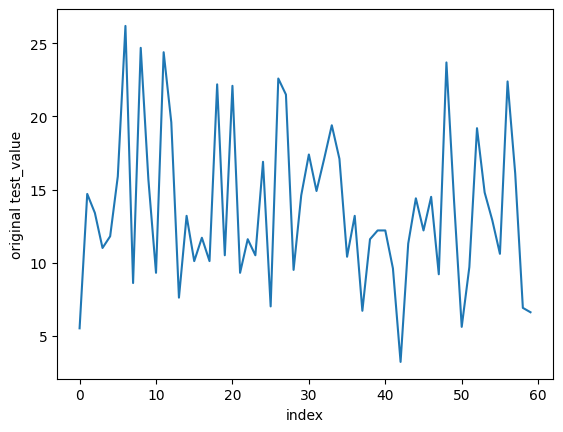

In [20]:
index=[i for i in range(60)]
plt.plot(index,y_test)
plt.xlabel("index")
plt.ylabel("original test_value")
plt.show()

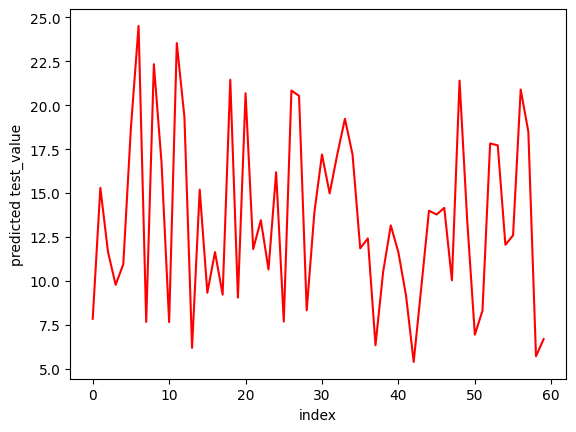

In [21]:
index=[i for i in range(60)]
plt.plot(index,predictions,color='red')
plt.xlabel("index")
plt.ylabel("predicted test_value")
plt.show()

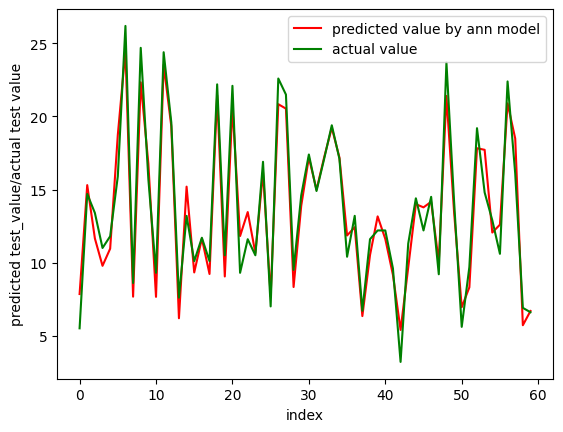

In [22]:
index=[i for i in range(60)]
plt.plot(index,predictions,color='red',label='predicted value by ann model')
plt.plot(index,y_test,color='green',label='actual value')
plt.xlabel("index")
plt.ylabel("predicted test_value/actual test value")
plt.legend()
plt.show()

# Implementation by Multiple Linear Regression

In [23]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Loading Data
df=pd.read_csv("advertising.csv")
print(df.head(5))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [25]:
# check for null value
print(df.isnull())

        TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]


In [26]:
# check for how many null value each attribute have
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [27]:
# check mean count std etc.
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [28]:
# Correlation matrix
print(df.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


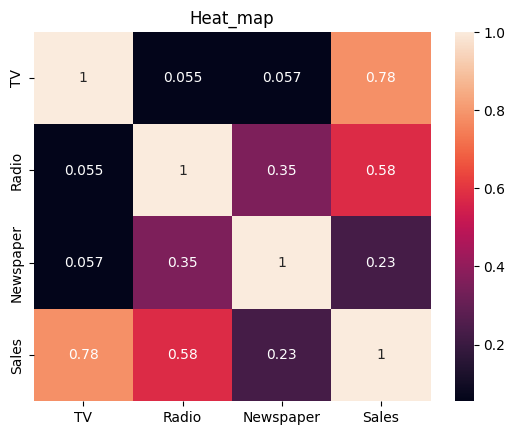

In [29]:
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.title("Heat_map")
plt.show()

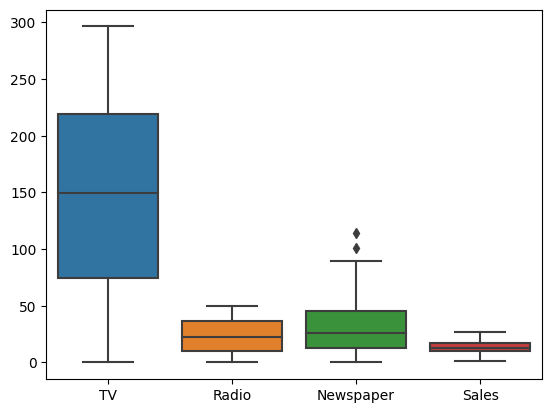

In [30]:
# check for outlier
sns.boxplot(data=df)
plt.show()

In [31]:
# splitting data in training and testing set
output_col="sales"
x_full=df.iloc[:,0:3]
print(x_full.head(5))
print("-----------------")
y_full=df.loc[:,'Sales']
# y_full can also we generated by y_full=df.iloc[:,-1]
# y_full=df.iloc[:,-1]
print(y_full.head(5))
x_train,x_test,y_train,y_test=train_test_split(x_full,y_full,test_size=0.30,random_state=43)
print(f"Shape of test data {x_test.shape}")

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
-----------------
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64
Shape of test data (60, 3)


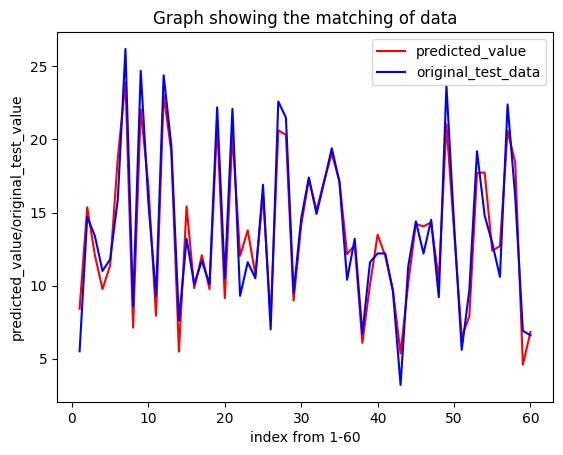

In [32]:
# Applying Multiple Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test);
index=[i for i in range(1,61)]
plt.plot(index,prediction,label="predicted_value",color="red")
plt.plot(index,y_test,label="original_test_data",color="blue")
plt.xlabel("index from 1-60")
plt.ylabel("predicted_value/original_test_value")
plt.title("Graph showing the matching of data")
plt.legend()
plt.show()

In [33]:
# finding R2 score
print(f"r2 score of the model is {r2_score(y_test,prediction)}")

r2 score of the model is 0.9220854203535253
